In [1]:
import os, sys, time, copy
import numpy as np
import matplotlib.pyplot as plt

import myokit
sys.path.append('../../../')
sys.path.append('../../../Protocols')
sys.path.append('../../../Models')
sys.path.append('../../../Lib')
import protocol_lib

In [2]:
def create_folder(path):
    if not os.path.exists(path):
        os.makedirs(path)
        print('"%s" has been created.'%(path))
    else:
        print("The folder already exists.")

In [3]:
result_dir = './Results'
create_folder(result_dir)

The folder already exists.


In [4]:
'''
O'Hara CiPA v1.0 2017
'''
cell_types = {
    'Endocardial' : 0,
    'Epicardial' : 1,
    'Mid-myocardial' : 2,
}
end_time = 500
bcl = 1000
duration = 0.5
offset = 20

t_span = (0, end_time)
# t_eval = np.linspace(0, t_span[1], 5000)  

In [5]:
import simulator_myokit
'''
Simulation with Myokit
'''
start_time = time.time()

model, p, s = myokit.load("../../../mmt-model-files/cipa-JK-v1.mmt")    
p = myokit.pacing.blocktrain(bcl*100, duration, offset=offset) # period, duration, offset=0, level=1.0, limit=0
sim = simulator_myokit.Simulator(model, p, max_step=1.0, abs_tol=1e-08, rel_tol=1e-10, vhold=-80)  # 1e-12, 1e-14  # 1e-08, 1e-10
sim.name = "CiPA"  

print("--- %s seconds ---"%(time.time()-start_time))

--- 13.634606838226318 seconds ---


In [10]:
y0_li = []
simulated_models = []
for name, mode in cell_types.items():    
    start_time = time.time()
    
    params = {         
        'cell.mode': mode,    
        # 'setting.simType': 0,   # 0: AP   |  1: VC  
    }
    sim.set_simulation_params(params)
    y0 = sim.pre_simulate(bcl*100, sim_type=0)
    y0_li.append(y0)
    d = sim.simulate(end_time, log_times=None)
    simulated_models.append(d)
    
    print("--- %s seconds ---"%(time.time()-start_time))

--- 1.8211827278137207 seconds ---
--- 1.8221595287322998 seconds ---
--- 1.8281097412109375 seconds ---


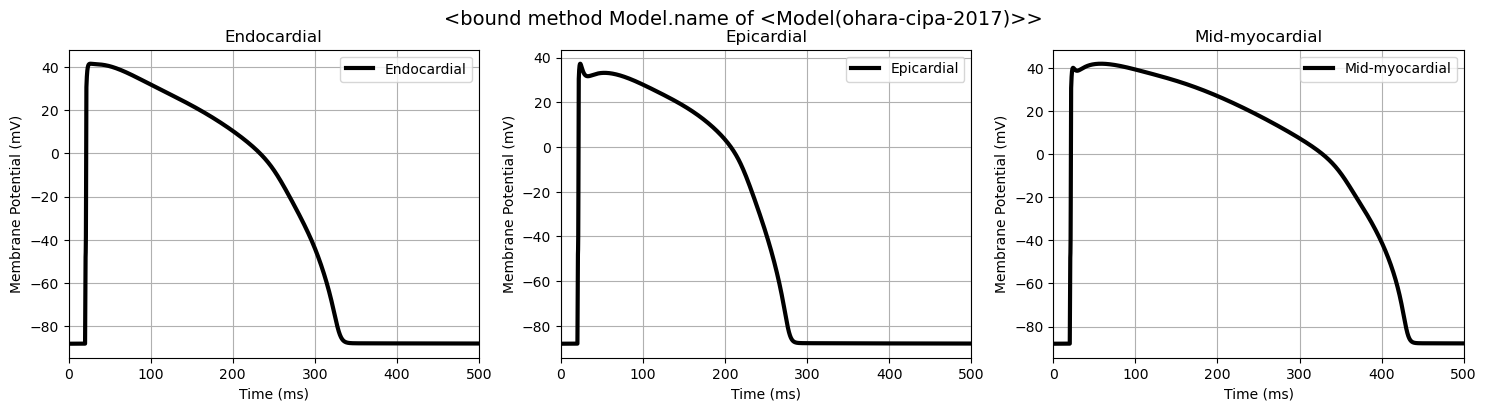

In [11]:
'''
Plot
'''
fig, axes = plt.subplots(1,3, figsize=(18,4))    
fig.suptitle(model.name, fontsize=14)
for name, mode in cell_types.items(): 
    m = simulated_models[mode]    
    
    axes[mode].set_title(name)
    axes[mode].set_xlim( m['engine.time'].min(),  m['engine.time'].max())
    # ax.set_ylim(ylim[0], ylim[1])
    axes[mode].set_ylabel('Membrane Potential (mV)')  
    axes[mode].set_xlabel('Time (ms)')       
    axes[mode].plot( m['engine.time'], m['membrane.V'], label=name, linewidth=3, color='k')     
    # axes[mode].plot(euler_m.times, euler_m.V, label='Euler', linewidth=2, color='k')   
        
    # textstr = "GNa : %1.4f\nGNaL : %1.4f\nGto : %1.4f\nPCa : %1.4f\nGKr : %1.4f\nGKs : %1.4f\nGK1 : %1.4f\nGf : %1.4f"%(GNa/g_fc[0], \
    #             GNaL/g_fc[1], Gto/g_fc[2], PCa/g_fc[3], GKr/g_fc[4], GKs/g_fc[5], GK1/g_fc[6], Gf/g_fc[7])
    # props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    #     ax.text(0.67, 0.60, textstr, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)    
    #     fig1 = plt.gcf()
    axes[mode].legend()
    axes[mode].grid()
    
#     print(bdf.V)
#     print(euler.V)
#     print("-"*100)
    
plt.show()
fig.savefig(os.path.join(result_dir, "OHara2017_AP.jpg"), dpi=100)

In [8]:
print("Complete")

Complete
